# Binary Classifier - the Iris Dataset

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    file = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd
# data from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
def load_iris_data():
    csv_file =  'iris.data'
    return pd.read_csv(csv_file, sep = ',', header = None)

In [3]:
iris = load_iris_data()
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris[4].replace({'Iris-setosa': 0, 'Iris-virginica': 0, 'Iris-versicolor' : 1}, inplace = True)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [5]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris, test_size=0.2, random_state=42)

In [7]:
test_set.head()

,0,1,2,3,4
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,0
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [8]:
iris = train_set.drop(4, axis=1) # drop labels for training set
iris_labels = train_set[4].copy()

In [9]:
train_set.head()

,0,1,2,3,4
22,4.6,3.6,1.0,0.2,0
15,5.7,4.4,1.5,0.4,0
65,6.7,3.1,4.4,1.4,1
11,4.8,3.4,1.6,0.2,0
42,4.4,3.2,1.3,0.2,0


In [10]:
iris.head()

,0,1,2,3
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [11]:
iris_labels

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    0
14     0
92     1
102    0
Name: 4, Length: 120, dtype: int64

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [13]:
from sklearn.compose import ColumnTransformer

In [14]:
num_attribs = list(iris)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

iris_prepared = full_pipeline.fit_transform(iris)

In [15]:
iris_prepared

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(iris_prepared, iris_labels)
rf_clf.fit(iris_prepared, iris_labels)

RandomForestClassifier(random_state=42)

In [17]:
some_data = iris.iloc[:10]
some_labels = iris_labels[:10]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", sgd_clf.predict(some_data_prepared))

Predictions: [0 0 1 0 0 0 0 0 0 0]


In [18]:
print("Labels:", list(some_labels))

Labels: [0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, iris_prepared, iris_labels, cv=3, scoring="accuracy")

array([0.675, 0.75 , 0.6  ])

In [20]:
from sklearn.model_selection import cross_val_predict

iris_train_predictions = cross_val_predict(sgd_clf, iris_prepared, iris_labels, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_labels, iris_train_predictions)

array([[64, 15],
       [24, 17]])

In [22]:
iris_train_scores_sgd = cross_val_predict(sgd_clf, iris_prepared, iris_labels, cv=3, method="decision_function")
iris_train_scores_rf = cross_val_predict(rf_clf, iris_prepared, iris_labels, cv=3, method="predict_proba")
y_scores_forest = iris_train_scores_rf[:, 1]

iris_train_scores_sgd[:5]

array([ -5.22120714, -22.72071328,  -7.7773094 ,  -0.15324815,
         3.19720734])

In [23]:
from sklearn.metrics import roc_curve

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(iris_labels, iris_train_scores_sgd)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(iris_labels, y_scores_forest)

Saving figure roc_curve_comparison_plot


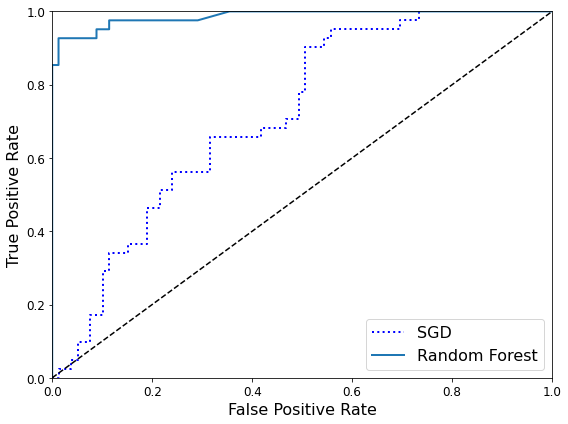

In [24]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score

roc_auc_score(iris_labels, iris_train_scores_sgd)

0.716270453843779

In [26]:
roc_auc_score(iris_labels, y_scores_forest)

0.9862611917258413